# Data Analysis Project — Telco Customer Churn
Motivation and aim for this project: To analyze the dataset and to make actionable insights to retain customers 
and increase customers’ lifetime values

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import re

import warnings
warnings.filterwarnings("ignore")

In [29]:
df =  pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(df.shape)
df

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [30]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Description of this dataset 
The data set includes information about:
    Your answer here

Description of this dataset 

The data set includes information about:
    
   - Customer demographic information: Gender, Dependents, SeniorCitizen
   - Types of products/services each customer uses: phone service, internet service, online security,...
   - Payment amount and method: total charges, monthly charge, payment method, contract
   - Customer churn or not

# PART 1: QUICK DATA CHECK

In [31]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The incorrect type of the TotalCharges column

In [32]:
# change TotalCharges in object to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
df['TotalCharges'].isnull().sum()

11

In [33]:
df.describe()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


SeniorCitizen is binary type

In [34]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

# PART 2: Exploratory Data Analysis: homework

In [35]:
###Check the balance of class label using value_counts()
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [36]:
###Create a stacked percentage bar chart for each demographic attribute (gender, SeniorCitizen, Partner, Dependents), 
###showing the percentage of Churn for each category of the attribute

###Draw a conclusion

In [37]:
###Create a stacked percentage bar chart for each category of the customer account attributes 
###(Contract, PaperlessBilling, PaymentMethod).

###Draw a conclusion

In [38]:
#### For all numeric attributes, the distributions of both classes (No and Yes) are different which suggests 
###that all of the attributes will be useful to determine whether or not a customer churns.
### Create a plot to show the distribution of tenure, MontlyCharges, TotalCharges by Churn 

### Draw a conclusion

In [39]:
###evaluate the percentage of the target for each category of the services columns(PhoneService, MultipleLines, InternetService
###,OnlineSecurity,OnlineBackup, DeviceProtection,TechSupport,StreamingTV, StreamingMovie) with stacked bar plots

### Draw a conclusion

# PART 3: FEATURE ENGINEERING

In [40]:
### Use label encoding with the following binary variables: (1) gender, (2) Partner, (3) Dependents, (4)PaperlessBilling, (5)PhoneService , and (6)Churn .
from sklearn.preprocessing import LabelEncoder

df_transformed = df.copy()

# label encoding (binary variables)
label_encoding_columns = ['gender', 'Partner', 'Dependents', 'PaperlessBilling', 'PhoneService', 'Churn']
df_transformed[label_encoding_columns] = df[label_encoding_columns].apply(LabelEncoder().fit_transform)
df_transformed

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,2234-XADUH,0,0,1,1,72,1,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,0,0,1,1,11,0,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


In [41]:
### Apply one-hot encoding to the following categorical variables: (1) Contract, (2) PaymentMethod, (3) MultipleLines, 
### (4) InternetServices, (5) OnlineSecurity, (6) OnlineBackup, (7) DeviceProtection, (8) TechSupport, (9) StreamingTV,
### and (10)StreamingMovies.
# one-hot encoding (categorical variables with more than two levels)
one_hot_encoding_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                            'TechSupport', 'StreamingTV',  'StreamingMovies', 'Contract', 'PaymentMethod']

df_transformed = pd.get_dummies(df_transformed, columns=one_hot_encoding_columns, prefix=one_hot_encoding_columns, prefix_sep= '_', drop_first=True)
df_transformed

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,0,0,0,0,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,0,0,0,0,0,1,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,0,0,0,0,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,1,0,0,0,0,1,0,0,0,0
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,1,84.80,1990.50,...,1,0,1,0,1,1,0,0,0,1
7039,2234-XADUH,0,0,1,1,72,1,1,103.20,7362.90,...,0,0,1,0,1,1,0,1,0,0
7040,4801-JZAZL,0,0,1,1,11,0,1,29.60,346.45,...,0,0,0,0,0,0,0,0,1,0
7041,8361-LTMKD,1,1,1,0,4,1,1,74.40,306.60,...,0,0,0,0,0,0,0,0,0,1


In [51]:
from sklearn.preprocessing import MinMaxScaler

min_max_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in min_max_columns:
    df_transformed[col] = MinMaxScaler().fit_transform(df[[col]])

In [53]:
X = df_transformed.drop(columns=['customerID', 'Churn'],axis=1).fillna(0)
y = df_transformed['Churn']

# PART 4: MODELING

Evaluate Machine Learning Algorithms:
- Train and Validation Sets
- K-Fold Cross Validation

CREATE A VALIDATION DATASET

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, random_state = 99)

print(X.columns)
print(y.name)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')
Churn


KFOLD CROSS-VALIDATION

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

num_folds = 10
seed = 99

kfold = KFold(n_splits = num_folds, random_state = seed, shuffle=True)
results  = cross_val_score(RandomForestClassifier(), X_train, y_train, cv=kfold)

for i in range(0,10):
    print("accuracy on fold" + str(i), results[i]*100)

accuracy on fold0 82.35294117647058
accuracy on fold1 80.52738336713996
accuracy on fold2 77.68762677484787
accuracy on fold3 84.38133874239351
accuracy on fold4 76.8762677484787
accuracy on fold5 79.91886409736308
accuracy on fold6 79.71602434077079
accuracy on fold7 77.28194726166329
accuracy on fold8 77.68762677484787
accuracy on fold9 79.3103448275862


In [58]:
print(results.mean(),results.std())

0.7957403651115619 0.022715335972009847


CLASSIFICATION METRICS:
    - Classification accuracy
    - Area Under ROC Curve
    - Confusion Matrix
    - Classification Report

In [59]:
results = cross_val_score(RandomForestClassifier(), X_train, y_train, cv=kfold, scoring='roc_auc')
print(results.mean(),results.std())

0.8278371436689091 0.024281041918500435


In [60]:
results

array([0.88800593, 0.80889541, 0.81119616, 0.84654878, 0.82839549,
       0.82328835, 0.84328719, 0.81259441, 0.81097992, 0.80517979])

CHOOSE THE BEST MACHINE LEARNING MODEL
The key to a fair comparison of machine learning algorithms is ensuring that each algorithm is
evaluated in the same way on the same data

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = [('LR',LogisticRegression()), ('KNN',KNeighborsClassifier()), ('DT',DecisionTreeClassifier()), ('SVM',SVC()), ('RF',RandomForestClassifier()) ]

results = []
names = []
scoring = 'roc_auc'

for name, model in models:
    kfold = KFold(n_splits=10,random_state = 99,shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)

    results.append(cv_results)
    names.append(name)

    print(f'{name}: {cv_results.mean()} ({cv_results.std()})')


LR: 0.8413394252929118 (0.02053318652917029)
KNN: 0.7800286993417016 (0.019882304453974722)
DT: 0.6548418427048136 (0.023943603741916043)
SVM: 0.8002174244064056 (0.02262478615422282)
RF: 0.8273740338035587 (0.02583215199943415)


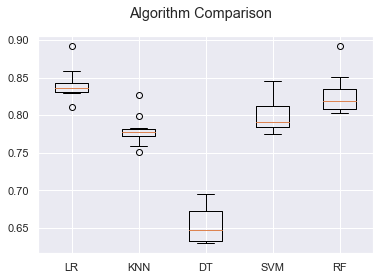

In [63]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

HYPERPARAMETER TUNING
- Grid Search Parameter Tuning
- Random Search Parameter Tuning

In [64]:
from sklearn.model_selection import GridSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [66]:
####Random Search Parameter Tuning
from sklearn.model_selection import RandomizedSearchCV
grid = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = param_grid, scoring='roc_auc', n_jobs=-1)
grid.fit(X_train,y_train)

print(grid.best_score_)
print(grid.best_params_)

0.8398965743269828
{'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 20, 'bootstrap': True}


In [71]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator = RandomForestClassifier(n_jobs=-1), param_grid = param_grid, scoring='roc_auc', n_jobs=-1)
grid.fit(X_train,y_train)

print(grid.best_score_)
print(grid.best_params_)

KeyboardInterrupt: 

MAKE PREDICTIONS

In [72]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

prob_predictions = [item[1] for item in rf_model.predict_proba(X_validation)]
predictions = rf_model.predict(X_validation)

print(roc_auc_score(y_validation, prob_predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.8392523246411967
[[1407  145]
 [ 284  277]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1552
           1       0.66      0.49      0.56       561

    accuracy                           0.80      2113
   macro avg       0.74      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113



In [84]:
param_grid = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

clf = GridSearchCV(LogisticRegression(), param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

clf.fit(X_train,y_train)

print(clf.best_score_)
print(clf.best_params_)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits
0.8036527448898445
{'C': 11.288378916846883, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [78]:
LogisticRegression().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])